# Hedonmeter vs Word2vec

This work is to compare word ranking generated by crowdsourcing and word ranking generated by concept vector.  For the comparison of the two rankings, I will use [Spearman's rho correlational coefficients](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

- Date: 12/02/2015
- Author: Deok Gun Park


## Hedonmeter
Link: http://hedonometer.org/index.html

### Example Data
word  |	happiness_rank	| happiness_average	| happiness_standard_deviation	| twitter_rank | 	google_rank |	nyt_rank |	lyrics_rank
-----|----------------|----------|------------|-------------|-------|---------|----------|
laughter	| 1 |	8.50	| 0.9313	| 3600	| --	| --	| 1728
happiness	| 2 |	8.44	| 0.9723	| 1853	| 2458	| --	| 1230
love	| 3 |	8.42	| 1.1082	| 25	| 317	| 328	| 23

## Glove
Link: http://nlp.stanford.edu/projects/glove/


### 1. Import Library

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
%matplotlib inline

### 2. Load Dataset 

#### Parameters

In [59]:
# Location of required dataset
hedonFileName = './data/hedonmeter.TXT'
w2vModelFileName = './data/glove.840B.300d.txt'


In [60]:
hedon = pd.read_csv(hedonFileName, sep='\t', header=0, skiprows=3)
w2vModel = pd.read_csv(w2vModelFileName, delim_whitespace=True, quoting=3, header=None, skiprows=0)
w2vModel = w2vModel.rename(columns={0:'word'})
w2vLabel = w2vModel['word'].tolist()

# w2vLabel = open(w2vLabelFileName).read().split('\n')
# w2vLabel = [w.rstrip() for w in w2vLabel ]

# #There is an error. It reads additional blank line. So remove here. 
# w2vLabel.pop()

# w2vModel = pd.read_csv(w2vModelFileName, sep='\t', header=None)

# #There is an error.  It reads one additional dimension. So remove here. 
# w2vModel = w2vModel.drop(300,1)

# w2vModel['word'] = pd.Series(w2vLabel, index=w2vModel.index)

In [61]:
# a = w2vModel['word']
# b = a.tolist()
# print b[0:10]
# w2vModel.head(30)

### 3. Find common words between two sets

In [62]:
# Iterate over hedon words and 
# If there is a same word in word2vec
# Add to the common words list 

common_words = []
hedon_words = hedon['word'].tolist()

counter = 0
for w in hedon_words:
    if w in w2vLabel:
        common_words.append(w)
    else:
#         print w
        counter += 1

print 'Common words generated.'
print str(counter) + ' words were skipped'

Common words generated.
152 words were skipped


In [63]:
print w2vLabel[0:100]

[',', '.', 'the', 'and', 'to', 'of', 'a', 'in', '"', ':', 'is', 'for', 'I', ')', '(', 'that', '-', 'on', 'you', 'with', "'s", 'it', 'The', 'are', 'by', 'at', 'be', 'this', 'as', 'from', 'was', 'have', 'or', '...', 'your', 'not', '!', '?', 'will', 'an', "n't", 'can', 'but', 'all', 'my', 'has', '|', 'do', 'we', 'they', 'more', 'one', 'about', 'he', ';', "'", 'out', '$', 'their', 'so', 'his', 'up', 'It', '&', 'like', '/', '1', 'which', 'if', 'would', 'our', '[', ']', 'me', 'who', 'just', 'This', 'time', 'what', 'A', '2', 'had', 'when', 'there', 'been', 'some', 'get', 'were', 'other', 'also', 'In', 'her', 'them', 'You', 'new', 'We', 'no', 'any', '>', 'people']


### 4. Get Ranking for the Word2Vec

Here the **common_words** represents ranking in the hedon ranking.  So we need to calculate the ranking for the word2vec case. To do this, 
1. We will filter w2vModel by the common_words
2. We will generate concept vector
    - by the single word {happy, sad}
    - by the group of words that were at the beginning 100 words and bottom 100 words
3. We will calculate the cosine similarity between concept vector and normal vector
4. We will sort and get the new ranking


#### Parameters

In [64]:
# Parameters

groupSize = 1000 
dimSize = 300
positive_term = 'happy'
negative_term = 'sad'

In [65]:
# 1. We will filter w2vModel by the common_words
# Remove w2vModel to save some memory
if 'w2vModel' in locals():
    filteredW2vModel = w2vModel[w2vModel['word'].isin(common_words)]
    del w2vModel



In [66]:
'w2vModel' in locals()

False

In [67]:
# 2. We will generate concept vector for both single and group
# First we will do single case
positive_terms = [positive_term]
negative_terms = [negative_term]

positive_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(positive_terms)].mean()[0:dimSize]
negative_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(negative_terms)].mean()[0:dimSize]

concept_vector_single = positive_terms_models - negative_terms_models

#Then we will do group case
positive_terms = common_words[0:groupSize]
negative_terms = common_words[-1*groupSize:]

positive_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(positive_terms)].mean()[0:dimSize]
negative_terms_models = filteredW2vModel[filteredW2vModel['word'].isin(negative_terms)].mean()[0:dimSize]

concept_vector_group = positive_terms_models - negative_terms_models


In [68]:
filteredW2vModel.iloc[0, 1:201]

1        0.27204
2       -0.06203
3        -0.1884
4       0.023225
5      -0.018158
6      0.0067192
7       -0.13877
8        0.17708
9        0.17709
10        2.5882
11      -0.35179
12      -0.17312
13       0.43285
14      -0.10708
15       0.15006
16      -0.19982
17      -0.19093
18        1.1871
19      -0.16207
20      -0.23538
21      0.003664
22      -0.19156
23     -0.085662
24      0.039199
25     -0.066449
26      -0.04209
27      -0.19122
28      0.011679
29      -0.37138
30       0.21886
         ...    
171      0.24672
172     -0.08905
173      0.15683
174      -0.2096
175     -0.22196
176     0.052394
177     -0.01136
178     0.050417
179     -0.14023
180    -0.042825
181    -0.031931
182     -0.21336
183     -0.20402
184     -0.23272
185      0.07449
186     0.088202
187     -0.11063
188     -0.33526
189    -0.014028
190     -0.29429
191    -0.086911
192      -0.1321
193     -0.43616
194      0.20513
195    0.0079362
196      0.48505
197     0.064237
198      0.142

In [69]:
# 3. We will calculate the dot product between concept vector and normal vector

filteredW2vModel['cosine_similarity_single'] = np.array([ cosine(filteredW2vModel.iloc[i,1:dimSize+1], concept_vector_single) for i in range(len(filteredW2vModel)) ])
filteredW2vModel['cosine_similarity_group'] = np.array([ cosine(filteredW2vModel.iloc[i,1:dimSize+1], concept_vector_group) for i in range(len(filteredW2vModel)) ])
filteredW2vModel.head()

word         1         2        3         4         5         6         7  \
2  the  0.272040 -0.062030 -0.18840  0.023225 -0.018158  0.006719 -0.138770   
3  and -0.185670  0.066008 -0.25209 -0.117250  0.265130  0.064908  0.122910   
4   to  0.319240  0.063160 -0.27858  0.261200  0.079248 -0.214620 -0.104950   
5   of  0.060216  0.217990 -0.04249 -0.386180 -0.153880  0.034635  0.222430   
6    a  0.043798  0.024779 -0.20937  0.497450  0.360190 -0.375030 -0.052078   

          8         9           ...                  293       294       295  \
2  0.177080  0.177090           ...             0.225110 -0.285570 -0.102800   
3 -0.093979  0.024321           ...             0.200720  0.170550 -0.004736   
4  0.154950 -0.033530           ...             0.188880 -0.004274 -0.106450   
5  0.217180  0.006848           ...             0.004813 -0.396290 -0.268230   
6 -0.605550  0.036744           ...             0.217600 -0.204090  0.092415   

        296       297       298       299       300  cosine_similarity_single  \
2 -0.018168  0.114070  0.130150 -0.183170  0.132300                  0.990275   
3 -0.039709  0.324980 -0.023452  0.123020  0.331200                  0.893304   
4 -0.258100 -0.044629  0.082745  0.097801  0.250450                  0.853580   
5  0.329200 -0.175970  0.117090 -0.166920 -0.094085                  1.007552   
6  0.080421 -0.061246 -0.300990 -0.145840  0.281880                  0.962368   

   cosine_similarity_group  
2                 0.892133  
3                 0.836885  
4                 0.880041  
5                 0.874296  
6                 0.887062  

[5 rows x 303 columns]

In [70]:
# 4. We will sort and get the new ranking
filteredW2vModel.sort_values(by='cosine_similarity_single', inplace=True)
filteredW2vModel['single_ranking'] = np.array([i+1 for i in range(len(filteredW2vModel))])

filteredW2vModel.sort_values(by='cosine_similarity_group', inplace=True)
filteredW2vModel['group_ranking'] = np.array([i+1 for i in range(len(filteredW2vModel))])
filteredW2vModel.head()

word         1         2         3         4         5         6  \
1153  wonderful  0.107900  0.485070 -0.253410  0.069338 -0.196250  0.388760   
5008   fabulous  0.322200  0.037595  0.032551  0.060823 -0.087417  0.290780   
2326  fantastic -0.014851  0.276200 -0.127960  0.030141 -0.056302  0.211990   
974      unique  0.203980  0.511150 -0.317810 -0.247510  0.229820  0.185000   
2269     lovely  0.322020  0.423800 -0.626900  0.141580 -0.306350 -0.088782   

            7         8        9      ...             295       296      297  \
1153  0.21743 -0.246070 -0.16159      ...        0.332230  0.055288  0.61552   
5008  0.32685 -0.235310 -0.19966      ...       -0.043854 -0.027647  0.48389   
2326  0.23783 -0.312260 -0.12338      ...        0.268750  0.008434  0.51670   
974  -0.19351  0.045458 -0.02718      ...       -0.123440 -0.155390 -0.08675   
2269  0.20183 -0.449740 -0.38470      ...        0.240360  0.072419  0.44677   

          298      299       300  cosine_similarity_single  \
1153 -0.10304 -0.13481  0.305590                  0.893739   
5008 -0.12809  0.16806  0.057739                  0.828174   
2326 -0.17252  0.18789  0.232420                  0.855231   
974   0.11851  0.23567  0.214490                  0.893621   
2269 -0.11275 -0.25161  0.455540                  0.934046   

      cosine_similarity_group  single_ranking  group_ranking  
1153                 0.442805             797              1  
5008                 0.454965             161              2  
2326                 0.489427             343              3  
974                  0.518269             795              4  
2269                 0.526260            1659              5  

[5 rows x 305 columns]

### 5. Calculate Spearman's rho

In [71]:
rankings = pd.DataFrame(common_words, columns=['word'])
rankings['hedon'] = np.array([i+1 for i in range(len(rankings))])
rankings['single_ranking'] = np.array([filteredW2vModel[filteredW2vModel.word == w].single_ranking.values[0] for w in common_words  ])
rankings['group_ranking'] = np.array([filteredW2vModel[filteredW2vModel.word == w].group_ranking.values[0] for w in common_words  ])

In [72]:
print 'Single ranking:\t' + str( spearmanr(rankings['hedon'], rankings['single_ranking']))
print 'Group ranking:\t' + str( spearmanr(rankings['hedon'], rankings['group_ranking']))


Single ranking:	SpearmanrResult(correlation=0.47636901659453856, pvalue=0.0)
Group ranking:	SpearmanrResult(correlation=0.67672917280132683, pvalue=0.0)


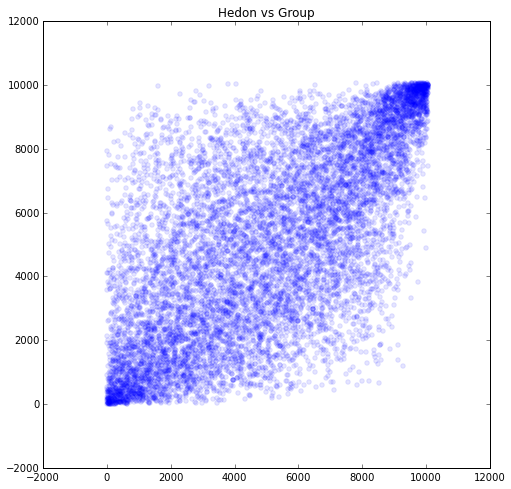

In [73]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title="Hedon vs Group")
ax.scatter(rankings['hedon'], rankings['group_ranking'], color="blue", alpha=0.1)


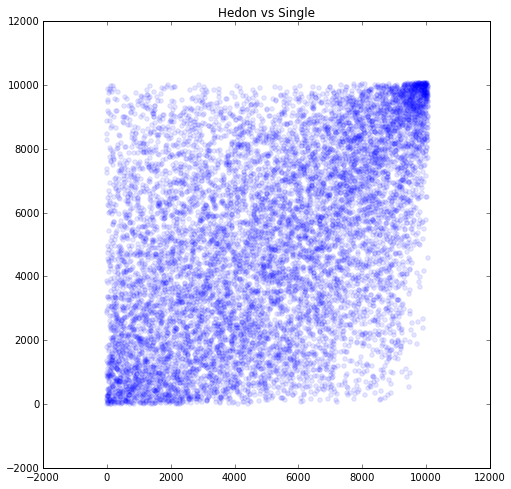

In [74]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title="Hedon vs Single")
ax.scatter(rankings['hedon'], rankings['single_ranking'], color="blue", alpha=0.1)


In [75]:
filteredW2vModel = filteredW2vModel.drop('single_ranking',1)


In [76]:
filteredW2vModel

word         1         2         3         4         5  \
1153     wonderful  0.107900  0.485070 -0.253410  0.069338 -0.196250   
5008      fabulous  0.322200  0.037595  0.032551  0.060823 -0.087417   
2326     fantastic -0.014851  0.276200 -0.127960  0.030141 -0.056302   
974         unique  0.203980  0.511150 -0.317810 -0.247510  0.229820   
2269        lovely  0.322020  0.423800 -0.626900  0.141580 -0.306350   
1342          gift -0.163590  0.172150  0.236340 -0.290950  0.154010   
627      beautiful  0.171200  0.534390 -0.348540 -0.097234  0.101800   
777          enjoy  0.275320 -0.029763 -0.340170 -0.322120  0.274400   
990        amazing -0.265650  0.467950  0.058068  0.002916 -0.135320   
5207       elegant  0.323750  0.187010 -0.111200 -0.388910  0.132080   
1123     excellent -0.331250  0.431380 -0.183450  0.048788  0.024143   
3749      gorgeous  0.088668  0.187750 -0.170750 -0.022399 -0.020352   
662        perfect -0.053411  0.476330 -0.079411 -0.015845  0.315600   
2511      exciting  0.474340 -0.046747  0.039782 -0.191300  0.705950   
2997         gifts -0.223030  0.038213  0.037511 -0.381420 -0.028089   
158          great -0.093846  0.582960 -0.019271 -0.070072  0.180950   
16293     splendid  0.237170  0.025011 -0.031719 -0.274420 -0.276110   
2203       enjoyed  0.274050  0.019922 -0.091275 -0.327240  0.064707   
3747   outstanding -0.268260  0.392470 -0.036467 -0.228370  0.083919   
600         offers  0.005838  0.551120  0.251960 -0.232630  0.756120   
7971     inspiring  0.293570  0.684440 -0.006085  0.213820  0.007289   
9023      terrific -0.222510  0.357820  0.079846  0.122240  0.114500   
5471        finest -0.090417  0.116290  0.418170 -0.522450  0.375200   
2314         ideal  0.327840  0.502070 -0.144870 -0.131600  0.572490   
865       favorite  0.242380 -0.289950 -0.054124  0.119550  0.229540   
4471   inspiration  0.374130  0.445650  0.229620  0.271740 -0.386380   
4424      stunning  0.194500  0.338480  0.185860 -0.041439  0.049608   
487            fun  0.141470  0.172640 -0.358650 -0.454900  0.266290   
4277      enjoying  0.489250 -0.200410 -0.216060 -0.107700  0.226960   
1707      offering  0.042685  0.293520  0.160350 -0.171020  0.732720   
...            ...       ...       ...       ...       ...       ...   
10393   violations -0.362840 -0.044326 -0.471540  0.279770  0.132930   
4276        severe -0.387100  0.462730 -0.172200  0.188430 -0.246490   
3839        threat -0.806560  0.038998  0.084059  0.208810 -0.193750   
21578     paranoid -0.264430 -0.668330  0.083222  0.113800 -0.378020   
7191       assault -0.285100  0.132370  0.101910  0.136010 -0.035516   
24814        thugs -0.301800 -0.638510  0.077048 -0.047502 -0.013046   
6602        crimes -0.410680  0.131290 -0.119960 -0.268790  0.160440   
11756    prevented -0.049859 -0.283490 -0.204050  0.110830 -0.613160   
42807      scarred  0.124760 -0.290650 -0.351410  0.325520 -0.080942   
13727  prosecution -0.537730 -0.015346 -0.046711  0.052130 -0.378610   
25676     disgrace -0.417440 -0.260440  0.335470  0.031709 -0.100030   
6489       violent -0.470100 -0.100920 -0.085068 -0.016852  0.345740   
8182    threatened -0.237440 -0.198670 -0.104770  0.247570 -0.335100   
15205       feared -0.144610 -0.290670  0.282970 -0.046921 -0.243200   
10948        fatal -0.030556  0.572240  0.240650  0.080910 -0.101190   
10934  allegations -0.595320  0.065830  0.229910  0.382080 -0.403450   
23669     killings -0.388890  0.200000  0.123110  0.168380  0.520820   
17015    condemned -0.074801 -0.156740  0.497960  0.011928 -0.023243   
35429      remorse -0.276950  0.425230 -0.299850  0.155400 -0.125520   
9455     suspected -0.207720 -0.000299 -0.145490  0.407260 -0.189740   
7709      attacked -0.482410 -0.187760 -0.158850  0.020830 -0.445930   
2187        caused -0.427950  0.271590 -0.370180 -0.046347 -0.579140   
4576         blame -0.743780  0.075079 -0.117920  0.029732 -0.631210   
3361       attacks -1.084800  0.208040  0.053999 -0.18